<span style="color:#deb66d">

---
---
---
---
# **Algoritmo $\rightarrow$ kNN $|$ Ensemble $\rightarrow$ Stacking**
---
---
---
---

</span>

| <span style="color:#ececeb"> **Descripción** </span>       | <span style="color:#ececeb"> **Detalles** </span>                   |
|-------------------------------|--------------------------------------------------------------------------------------------------|
| **Problema seleccionado**     | Flu Shot Learning (predicción relativa a las vacunas contra la gripe H1N1 y la gripe estacional) |
| **Algoritmo base**            | kNN y derivados                                                                                  |
| **Método ensemble**           | Stacking                                                                                         |
| **Fecha**                     | 26 de enero 2025                                                                                 |
| **Estudiante**                | Adrián Sánchez Carrión                                                                           |

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
## **1. Importación de librerías**
---
---
---

</span>

Lo primero que hacemos es cargar las librerías necesarias para el desarrollo del algoritmo. En este caso, utilizaremos las librerías de pandas, numpy, matplotlib, seaborn, sklearn y joblib para la carga y manipulación de datos, cálculos matemáticos, visualización y la implementación del algoritmo de kNN y el ensemble de Stacking, respectivamente.

In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

%matplotlib inline
import matplotlib.pyplot as plt # type: ignore

import joblib # type: ignore

from IPython.display import Image, display # type: ignore

from sklearn.model_selection import train_test_split, GridSearchCV # type: ignore
from sklearn.preprocessing import MinMaxScaler # type: ignore
from sklearn.multioutput import MultiOutputClassifier # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.ensemble import StackingClassifier # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_curve, roc_auc_score # type: ignore

Más en detalle:

- `numpy y pandas:` Librerías fundamentales para la manipulación y análisis de datos.
- `matplotlib.pyplot:` Utilizada para la visualización de datos.
- `joblib:` Utilizada para guardar y cargar modelos entrenados.
- `IPython.display:` Utilizada para imágenes en el notebook.
- `sklearn.model_selection:` Contiene herramientas para dividir los datos en conjuntos de entrenamiento y prueba, y para realizar búsquedas de hiperparámetros.
- `sklearn.preprocessing:` Contiene herramientas para escalar y transformar los datos.
- `sklearn.multioutput:` Permite trabajar con problemas de salida múltiple.
- `sklearn.neighbors:` Contiene el clasificador K-Nearest Neighbors.
- `sklearn.ensemble:` Contiene el clasificador de apilamiento (Stacking Classifier).
- `sklearn.linear_model:` Contiene el modelo de regresión logística.
- `sklearn.tree:` Contiene el clasificador de árbol de decisión.
- `sklearn.metrics:` Proporciona funciones para evaluar el rendimiento de los modelos.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
## **2. Carga y preparación específica de los datos**
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
### **2.1. Carga de los datos**
---
---

</span>

Una vez cargadas las librerías necesarias, pasamos a leer los datos que utilizaremos para entrenar y evaluar los algoritmos. En este caso, los datos que utilizaremos son los datos que ya hemos particionado y preprocesado previamente (entrenamiento [`preprocessed_X_training`; `partition_y_training`] y validación [`preprocessed_X_validation`; `partition_y_validation`]), junto con la partición de test, ya proporcionada por la competición y preprocesada de igual forma también por nosotros [`preprocessed_X_test`] (sabiendo que para esta partición de test no disponemos de las etiquetas).

Además tener en cuenta que tan solo se han preprocesado las particiones con los datasets de las características, ya que las etiquetas, en este caso, no necesitan ser preprocesadas dado que contienen valores binarios.

In [15]:
# Cargar las particiones preprocesadas de entrenamiento (features y labels)
X_train = pd.read_csv("../../Data/Preprocessed/Prueba2/preprocessed_X_training.csv", index_col=0)
y_train = pd.read_csv("../../Data/Preprocessed/Prueba2/partition_y_training.csv", index_col=0)

# Cargar las particiones preprocesadas de validación (features y labels)
X_val = pd.read_csv("../../Data/Preprocessed/Prueba2/preprocessed_X_validation.csv", index_col=0)
y_val = pd.read_csv("../../Data/Preprocessed/Prueba2/partition_y_validation.csv", index_col=0)

# Cargar la partición preprocesada de test (features)
X_test = pd.read_csv("../../Data/Preprocessed/Prueba2/preprocessed_X_test.csv", index_col=0)

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **2.2. Comprobación de la estructura de los datos cargados**
---
---

</span>

Una vez cargados los datos, pasamos a comprobar la estructura de los mismos para ver si han sido cargados correctamente. Para ello, comenzamos comprobando el número de filas y columnas de los mismos:

In [6]:
# Ver el tamaño de los datos
print(f'Training Features shape: {X_train.shape}')
print(f'Training Labels shape: {y_train.shape}')
print(f'Validation Features shape: {X_val.shape}')
print(f'Validation Labels shape: {y_val.shape}')
print(f'Test Features shape: {X_test.shape}')

Training Features shape: (21365, 48)
Training Labels shape: (21365, 2)
Validation Features shape: (5342, 48)
Validation Labels shape: (5342, 2)
Test Features shape: (26708, 48)


Y ahora, visualizamos las primeras filas de cada conjunto de datos para comprobar que los datos han sido cargados correctamente. Primero visualizamos las primeras filas de los datos de entrenamiento:

In [7]:
# Mostramos los primeros registros de la partición de características de entrenamiento
X_train.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
12230,2.0,2.0,5.0,4.000000,4.0,5.0,4.0,4.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8871,1.0,1.0,4.0,2.000000,1.0,5.0,4.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
2390,1.0,1.0,2.0,2.000000,1.0,5.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9227,2.0,1.0,4.0,1.000000,2.0,4.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9064,2.0,1.0,4.0,2.919163,2.0,4.0,4.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Ahora, visualizamos las primeras de las etiquetas de los datos de entrenamiento:

In [10]:
# Mostramos los primeros registros de la partición de etiquetas de entrenamiento
y_train.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
12230,0,1
8871,0,1
2390,0,1
9227,0,0
9064,0,0


Hacemos lo mismo con los datos de validación. Primero mostramos las primeras filas de la partición de características para validación:

In [9]:
# Mostramos los primeros registros de la partición de características de validación
X_val.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
22317,1.0,1.0,2.0,1.0,2.0,4.0,4.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1215,2.0,2.0,5.0,4.0,1.0,4.0,4.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
10540,2.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0
7407,3.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14697,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Y visualizamos las primeras de las etiquetas de los datos de validación:

In [11]:
# Mostramos los primeros registros de la partición de etiquetas de entrenamiento
y_val.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,1
1215,0,1
10540,0,0
7407,0,0
14697,0,0


Finalmente, mostramos las primeras filas de los datos que contienen las características de la partición de test:

In [12]:
# Mostramos los primeros registros de la partición de características de test
X_test.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26708,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
26709,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,2.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
26710,1.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
26711,3.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **2.3. Normalización de los datos**
---
---

</span>

Una vez hecho esto, adicionalmente al proceso realizado en el preprocesamiento común, para aplicar de forma óptima el algoritmo de kNN, es necesario normalizar los datos. Para ello, utilizamos la función `MinMaxScaler` de la librería `sklearn.preprocessing` para normalizar los datos de entrenamiento y posteriormente normalizar los datos de test con los mismos valores de normalización que los datos de entrenamiento.

Mencionar, que hemos preferido emplear la normalización Min-Max en lugar de la estandarización, ya que no tenemos evidencias para afirmar que los datos siguen una distribución normal, por lo que podría ser más adecuada la normalización Min-Max.

In [16]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalamos los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Escalamos los datos de validación
X_val_scaled = scaler.transform(X_val)

# Escalamos los datos de test
X_test_scaled = scaler.transform(X_test)

Una vez hecho esto, podemos comprobar que los datos han sido normalizados correctamente intentando visualizar los resultados obtenidos:

In [17]:
# Mostramos el resultado de normalizar las variables numéricas
X_train_scaled

array([[0.66666667, 1.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.5       , 0.75      , ..., 0.        , 0.66666667,
        0.        ],
       [0.33333333, 0.5       , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.5       , ..., 0.        , 0.33333333,
        0.        ],
       [0.66666667, 0.5       , 0.5       , ..., 1.        , 0.33333333,
        0.33333333]])

Así, podemos ver que parece ser que los datos si han sufrido una normalización, pero dado el formato matricial, resulta dificil comprobarlo de forma clara. Por lo que vemos que ahora, en lugar de tener un DataFrame de pandas, tenemos un array de numpy, por lo que podemos convertirlo de nuevo a un DataFrame de pandas para poder visualizar los datos de forma más cómoda.

In [23]:
# Convertir el array normalizado a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Y ahora, sí podemos comprobar que los datos han sido normalizados correctamente de forma más sencilla:

In [ ]:
# Mostramos los primeros registros del dataset con cada una de las características de entrenamiento una vez normalizadas
X_train_scaled_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
12230,0.666667,1.0,1.00,0.759734,0.75,1.00,0.759223,0.75,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0
8871,0.333333,0.5,0.75,0.279201,0.00,1.00,0.759223,0.75,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.0
2390,0.333333,0.5,0.25,0.279201,0.00,1.00,0.759223,0.25,1.0,1.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0
9227,0.666667,0.5,0.75,0.038935,0.25,0.75,0.036890,0.25,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.0
9064,0.666667,0.5,0.75,0.500045,0.25,0.75,0.759223,0.25,0.5,1.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0


Visualizamos también los datos de validación normalizados:

In [ ]:
# Mostramos los primeros registros del dataset con cada una de las características de validación una vez normalizadas
X_val_scaled_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
22317,0.333333,0.5,0.25,0.038935,0.25,0.75,0.759223,0.25,0.75,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.333333
1215,0.666667,1.0,1.00,0.759734,0.00,0.75,0.759223,0.00,0.25,0.666667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.333333,0.333333
10540,0.666667,0.5,0.75,0.038935,0.00,0.75,0.036890,0.00,0.75,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,1.000000
7407,1.000000,0.5,1.00,0.279201,0.25,0.25,0.277668,0.25,1.00,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
14697,0.333333,0.5,1.00,0.038935,0.00,1.00,0.036890,0.00,0.75,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000


Y finalmente hacemos lo mismo para los datos de test:

In [26]:
# Mostramos los primeros registros del dataset con cada una de las características de validación una vez normalizadas
X_test_scaled_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.666667,1.0,1.00,0.038935,0.00,1.00,0.036890,0.00,0.25,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000
26708,0.333333,0.5,0.75,0.038935,0.00,0.75,0.036890,0.00,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000
26709,0.666667,1.0,1.00,0.759734,0.25,1.00,0.759223,0.75,0.50,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.000000
26710,0.333333,0.5,0.75,0.279201,0.25,0.75,0.759223,0.25,1.00,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000
26711,1.000000,0.5,1.00,0.279201,0.75,0.75,0.759223,0.25,0.25,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.333333


Por último, nos podemos asegurar de que todos los datos son numéricos, hecho necesario para poder aplicar el algoritmo de kNN:

In [40]:
# Asegurarse de que todas las columnas sean del tipo correcto
X_train_scaled_df = X_train_scaled_df.astype(float)
X_val_scaled_df = X_val_scaled_df.astype(float)
X_test_scaled_df = X_test_scaled_df.astype(float)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

Ahora, antes de pasar a entrenar los modelos, vamos a cambiar la nomenclatura de las variables normalizadas, por la que teníamos inicialmente, con el fin de hacer el proceso más intuitivo y homogéneo.

In [52]:
# Modificamos la nomenclatura de las variables
X_train_df = X_train_scaled_df
X_val_df = X_val_scaled_df
X_test_df = X_test_scaled_df

Además, vamos a convertir estos DataFrames a arrays de numpy, ya que el algoritmo de kNN trabaja mejor con este tipo de estructuras al ser más sencillas y rápidas de procesar.

In [53]:
# Trasformar los datos a arrays
X_train = X_train_df.values
X_val = X_val_df.values
X_test = X_test_df.values

Y así, tenemos los siguientes datos con los que trabajaremos:

In [44]:
# Verificar tamaños
print(f"Para X -> Tamaño de Train: {X_train.shape}, Validación: {X_val.shape}, Test: {X_test.shape}")
print(f"Para y -> Tamaño de Train: {y_train.shape}, Validación: {y_val.shape}")

Para X -> Tamaño de Train: (21365, 48), Validación: (5342, 48), Test: (26708, 48)
Para y -> Tamaño de Train: (21365, 2), Validación: (5342, 2)


Realizado todo esto, ahora sí, pasamos a entrenar los modelos.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
## **3. kNN**
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
### **3.1. Búsqueda del mejor modelo**
---
---

</span>

Ahora, con todos los pasos posteriores realizados, ya estamos listos para implementar el algoritmo kNN.

Para ello, lo que vamos a hacer es definir un clasificador K-Nearest Neighbors (`KNeighborsClassifier`) y envolverlo en un `MultiOutputClassifier` para manejar múltiples salidas. Luego, definimos una cuadrícula de parámetros (`param_grid`) que incluye diferentes métricas de distancia, números de vecinos y tipos de pesos. 

Después, creamos un objeto GridSearchCV para realizar una búsqueda en la cuadrícula de parámetros con validación cruzada de 5 pliegues (`cv=5`). Ajustamos el modelo a los datos de entrenamiento (`X_train, y_train`) y finalmente imprimimos los mejores hiperparámetros encontrados.

In [45]:
# Define the KNeighborsClassifier
knn = KNeighborsClassifier()

# Wrap it in a MultiOutputClassifier
multi_target_knn = MultiOutputClassifier(knn)

# Define the parameter grid
param_grid = {
    'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],
    'estimator__n_neighbors': [3, 5, 7],
    'estimator__weights': ['uniform', 'distance']
}

# Create the GridSearchCV object
grid_knn = GridSearchCV(multi_target_knn, param_grid, cv=5)

# Fit the model
grid_knn.fit(X_train, y_train)

# Print the best parameters
print("Mejores hiperparámetros KNN:", grid_knn.best_params_)

Mejores hiperparámetros KNN: {'estimator__metric': 'manhattan', 'estimator__n_neighbors': 7, 'estimator__weights': 'uniform'}


En este caso, vemos que los mejores hiperparámetros encontrados son los siguientes:

- Métrica de distancia: `'manhattan'`
- Número de vecinos: `7`
- Tipo de pesos: `'uniform'`

Esto quiere decir que el modelo kNN que mejor se ajusta a los datos de entrenamiento es aquel que utiliza la métrica de distancia de Manhattan, 7 vecinos y pesos uniformes, por lo que en las siguientes secciones emplearemos estos hiperparámetros para entrenar el modelo final.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **3.2. Evaluación con el mejor modelo**
---
---

</span>

Como hemos dicho, ahora vamos a emplear el modelo obtenido anteriormente con los mejores hiperparámetros para evaluar su rendimiento en el conjunto de validación. Para ello, primero obtenemos el mejor modelo encontrado por `GridSearchCV` y lo guardamos en un archivo utilizando `joblib`. Esto nos permitirá reutilizar el modelo entrenado sin tener que volver a entrenarlo en el futuro.

In [47]:
# Obtener el mejor modelo
knn_best = grid_knn.best_estimator_

# Guardar el modelo entrenado
joblib.dump(knn_best, '../../Algorithms/Prueba2/knn_best_model.pkl')

['../../Algorithms/Prueba2/knn_best_model.pkl']

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **3.2.1. Predicción de valores enteros (predict)**
---

</span>

Una vez guardado el modelo, lo cargamos y realizamos predicciones sobre el conjunto de validación. Para ello, empleamos el método `predict` del modelo, que nos devolverá las predicciones realizadas sobre el conjunto de validación.

Así, la función `knn_best.predict(X_val)` devuelve las etiquetas de clase predichas para cada muestra en el conjunto de validación. Es decir, para cada muestra, proporciona la clase que el modelo considera más probable. Esto es útil cuando solo necesitamos las etiquetas de clase predichas.

En este problema concreto, dado que el problema es de múltiples etiquetas (multi-output) donde tenemos que predecir más de una variable de salida, el proceso es similar al de un problema de clasificación estándar, pero se aplica a cada variable de salida por separado. Aquí es donde el uso de `MultiOutputClassifier` es útil, ya que permite manejar múltiples salidas simultáneamente.

Por lo que en este caso, `knn_best.predict(X_val)` devolverá una matriz donde cada fila corresponde a una muestra y cada columna a una variable de salida. Cada valor en la matriz será la etiqueta predicha para la muestra correspondiente y la variable de salida correspondiente.

In [48]:
# Evaluar KNN en el conjunto de validación
knn_preds = knn_best.predict(X_val)

Una vez realizadas las predicciones sobre el conjunto de validación, podemos evaluar el rendimiento del modelo. Para ello, primero convertimos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro.

In [54]:
# Convertir las predicciones a un DataFrame de pandas
knn_preds_df = pd.DataFrame(knn_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_val_df.index)

# Guardar el DataFrame en un archivo CSV
knn_preds_df.to_csv('../../Data/Algorithms/Prueba2/knn_preds.csv', index=True)

Mostrar las primeras filas de las predicciones realizadas:

In [55]:
knn_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,0
1215,1,1
10540,0,0
7407,0,0
14697,0,0


Ahora sí, podemos evaluar el rendimiento del modelo. Para ello, empleamos la métrica de evaluación `accuracy_score` de la librería `sklearn.metrics`, que nos permite calcular la precisión de las predicciones realizadas por el modelo y `classification_report` para obtener un informe más detallado de la precisión, recall, f1-score y support de las predicciones realizadas.

In [56]:
# Calcular y mostrar la exactitud
print("Accuracy en validación:", accuracy_score(y_val, knn_preds), end="\n\n")

# Calcular y mostrar el F1-score
f1 = f1_score(y_val, knn_preds, average='weighted', zero_division=0)
print("F1 Score (weighted):", f1)

# Calcular y mostrar la precisión
precision = precision_score(y_val, knn_preds, average='weighted', zero_division=0)
print("Precision (weighted):", precision)

# Calcular y mostrar el recall
recall = recall_score(y_val, knn_preds, average='weighted', zero_division=0)
print("Recall (weighted):", recall, end="\n\n")

# Calcular y mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_val, knn_preds, zero_division=0))

Accuracy en validación: 0.5849868962935231

F1 Score (weighted): 0.5875830270026352
Precision (weighted): 0.6642976052708987
Recall (weighted): 0.5478884902014904

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.62      0.29      0.39      1135
           1       0.69      0.67      0.68      2488

   micro avg       0.67      0.55      0.60      3623
   macro avg       0.65      0.48      0.54      3623
weighted avg       0.66      0.55      0.59      3623
 samples avg       0.30      0.28      0.28      3623



Los resultados obtenidos muestran que el modelo KNN tiene una precisión de validación de 59.55%. El reporte de clasificación indica que el modelo tiene una precisión de 0.61 para la clase 0 y de 0.70 para la clase 1. Sin embargo, el recall para la clase 0 es bastante bajo (0.28), lo que sugiere que el modelo tiene dificultades para identificar correctamente los casos de la clase 0.

El f1-score, que es una medida combinada de precisión y recall, es de 0.38 para la clase 0 y de 0.69 para la clase 1. En general, el modelo parece funcionar mejor para la clase 1 que para la clase 0. La media ponderada (weighted avg) del f1-score es de 0.59, lo que indica un rendimiento moderado del modelo en general.

Como aclaración, cada una de estas métricas hacen referencia a lo siguiente:

  - **Precisión:** es la proporción de verdaderos positivos entre todos los casos que el modelo ha clasificado como positivos. En otras palabras, mide la exactitud de las predicciones positivas del modelo. Una precisión alta significa que el modelo comete pocos errores al predecir la clase positiva.

  - **Recall:** también conocido como sensibilidad o tasa de verdaderos positivos, es la proporción de verdaderos positivos entre todos los casos que realmente son positivos. Mide la capacidad del modelo para identificar correctamente todos los casos positivos. Un recall alto significa que el modelo detecta la mayoría de los casos positivos.

  - **f1-score:** es la media armónica de la precisión y el recall. Proporciona una única métrica que equilibra ambos aspectos, siendo útil cuando se necesita un balance entre precisión y recall. Un f1-score alto indica que el modelo tiene tanto una alta precisión como un alto recall.

  - **Support:** es el número de ocurrencias reales de cada clase en el conjunto de datos. Proporciona contexto sobre cuántos ejemplos de cada clase hay, lo cual es importante para interpretar las otras métricas. Por ejemplo, si una clase tiene un support bajo, las métricas asociadas a esa clase pueden ser menos confiables.

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **3.2.2. Predicción de probabilidades (predict_proba)**
---

</span>

Dado el propósito final de este problema, resultaría más conveniente implementar un modelo que prediga probabilidades en lugar de etiquetas de clase. Esto se debe a que, en la competición, se evalúa la predicción de probabilidades en lugar de las etiquetas de clase directamente.

Así, en este caso, la función `knn_best.predict_proba(X_val)` devolverá una lista de matrices de probabilidades, una para cada variable de salida. Cada matriz de probabilidades tendrá las probabilidades de pertenencia a cada clase para cada muestra, similar a un problema de clasificación estándar pero repetido para cada variable de salida.

Dicho esto, pasamos a prededir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de validación.

In [57]:
# Evaluar KNN en el conjunto de validación
knn_preds_proba = knn_best.predict_proba(X_val)

Una vez hecho esto, imprimimos las formas (shapes) de las matrices de probabilidades para cada una de las variables de salida. Esto nos permitirá verificar las dimensiones de las probabilidades predichas por el modelo KNN para cada variable de salida.

La salida mostrará las dimensiones de las matrices de probabilidades para la primera y la segunda variable de salida, respectivamente.

In [58]:
print("knn_preds_proba[0].shape", knn_preds_proba[0].shape)
print("knn_preds_proba[1].shape", knn_preds_proba[1].shape)

knn_preds_proba[0].shape (5342, 2)
knn_preds_proba[1].shape (5342, 2)


Así vemos que esta función nos ha devuelto una lista de dos matrices `(n_obs, 2)`. La primera matriz es para `h1n1_vacciney` la segunda matriz es para `seasonal_vaccine`. Las dos columnas de cada matriz son probabilidades para la clase `0` y la clase `1` respectivamente.

Mediante el siguiente código creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`). Utilizamos las probabilidades de la clase positiva (índice 1) para cada variable de salida.

Luego, imprimimos la forma (`shape`) del DataFrame resultante para verificar sus dimensiones y mostramos los primeros 10 registros para inspeccionar las predicciones. Finalmente, guardamos este DataFrame en un archivo CSV para poder analizar las probabilidades predichas posteriormente.

In [59]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": knn_preds_proba[0][:, 1],
        "seasonal_vaccine": knn_preds_proba[1][:, 1],
    },
    index = y_val.index
)

# Ver los primeros registros de las predicciones
print("y_preds.shape:", y_preds.shape)
y_preds.head(10)

# Guardar el DataFrame en un archivo CSV
y_preds.to_csv('../../Data/Algorithms/Prueba2/knn_preds_proba.csv', index=True)

y_preds.shape: (5342, 2)


Mostramos ahora las primeras filas del DataFrame de probabilidades predichas:

In [60]:
y_preds.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.428571,0.285714
1215,0.857143,1.000000
10540,0.000000,0.285714
7407,0.142857,0.428571
14697,0.000000,0.142857


Ahora, dado que este problema o más específicamene esta competencia propuesta, emplea la métrica de evaluación `roc_auc_score`, que mide el área bajo la curva ROC (AUC) para evaluar la calidad de las predicciones de probabilidad de un modelo, empleamos la métrica `roc_auc_score` de la librería `sklearn.metrics` para calcular el AUC para cada variable de salida y luego calculamos la media de los dos AUC para obtener una medida general del rendimiento del modelo. Además, calculamos otras métricas adicionales, como las empleadas anteriormente, para evaluar el rendimiento del modelo.

In [61]:
# Calcular el AUROC para cada variable de salida
roc_auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], knn_preds_proba[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], knn_preds_proba[1][:, 1])

# Calcular el AUROC promedio
roc_auc_promedio = roc_auc_score(y_val, y_preds)

# Imprimir los AUROC
print(f"AUROC para H1N1: {roc_auc_h1n1}")
print(f"AUROC para vacuna estacional: {roc_auc_seasonal}")
print(f"AUROC promedio: {roc_auc_promedio}")

AUROC para H1N1: 0.7321991143353483
AUROC para vacuna estacional: 0.7643858002645355
AUROC promedio: 0.7482924572999419


Una vez hecho esto, podemos graficar estos resultados para poder visualizarlos de forma más clara. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida. Esta curva representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes umbrales de probabilidad.

In [63]:
# Función para graficar la curva ROC
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr, color="blue")
    ax.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

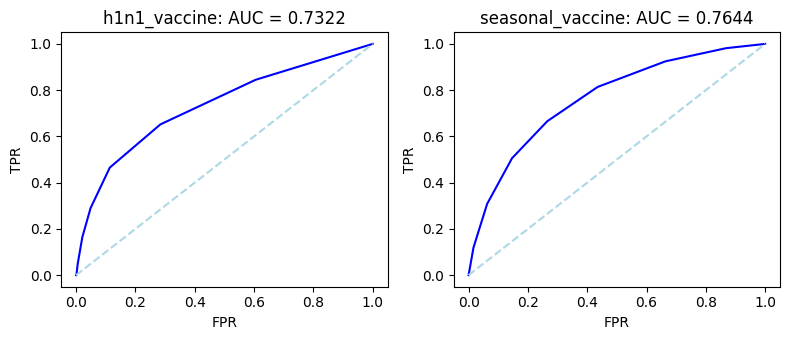

In [64]:
# Realizar la gráfica de la curva ROC
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)

fig.tight_layout()
plt.show()

Esta gráfica se utiliza para evaluar la calidad de las predicciones de probabilidad de un modelo. Un modelo con un AUC más alto tendrá una curva ROC más cercana al rincón superior izquierdo, lo que indica una mejor separación entre las clases positivas y negativas.

En este caso, la curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.74, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.77. En general, el modelo KNN parece tener un rendimiento moderado en la predicción de probabilidades, con un AUC promedio de 0.76.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
## **4. Stacking**
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
### **4.1. Creación del modelo**
---
---

</span>

Una vez realizado el proceso de kNN, pasamos a implementar el ensemble de Stacking.

Un ensemble de stacking es un método de aprendizaje automático que combina múltiples modelos de aprendizaje automático para mejorar el rendimiento predictivo. En este caso, vamos a implementar un ensemble de stacking que combina un modelo de regresión logística y un modelo de árbol de decisión con el modelo kNN que hemos entrenado anteriormente.

Dicho esto, lo que vamos a hacer es definir los modelos base que vamos a utilizar en el ensemble de stacking:

In [65]:
# Extraer los mejores parámetros de knn_best
best_params = knn_best.get_params()

knn_params = {k: v for k, v in best_params.items() if k in KNeighborsClassifier().get_params()}

# Crear una nueva instancia de KNeighborsClassifier con los mejores parámetros
knn_best_unfitted = KNeighborsClassifier(**knn_params)

# Configuración del modelo de Stacking
estimators = [
    ('knn', knn_best_unfitted),  # Puedes usar knn_best si ya está definido
    ('tree', DecisionTreeClassifier(max_depth=5))
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# Envolver el modelo de Stacking en un MultiOutputClassifier
multi_output_stacking_model = MultiOutputClassifier(stacking_model)

Entonces, lo que se ha realizado es lo siguiente:

1. Se extraen los mejores parámetros del modelo `knn_best` utilizando el método `get_params()`, como se ha hecho anteriormente.
2. Se filtran los parámetros relevantes para el `KNeighborsClassifier` y se almacenan en el diccionario `knn_params`.
3. Se crea una nueva instancia de `KNeighborsClassifier` con los mejores parámetros obtenidos, llamada `knn_best_unfitted`.
4. Se configura un modelo de Stacking, que combina múltiples clasificadores. En este caso, se utilizan `knn_best_unfitted` y `DecisionTreeClassifier` como estimadores base.
5. Se define el clasificador final del modelo de Stacking como `LogisticRegression`.

Así, este modelo de Stacking (`stacking_model`) se puede utilizar para mejorar el rendimiento combinando las predicciones de múltiples clasificadores.

Finalmente, antes de entrenar el modelo, se envuelve el modelo de Stacking (`stacking_model`) en un `MultiOutputClassifier` para manejar múltiples variables de salida, dado que nos encontramos en un problema de múltiples etiquetas.

Y ahora sí, pasamos a entrenar el modelo de Stacking envuelto (`multi_output_stacking_model`) utilizando los datos de entrenamiento (`X_train`, `y_train`).

Esto permite que el modelo de Stacking maneje múltiples etiquetas de salida simultáneamente, entrenándose para predecir todas las variables de salida a la vez.

In [66]:
# Entrenar el modelo de Stacking
multi_output_stacking_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=StackingClassifier(estimators=[('knn',
                                                                KNeighborsClassifier()),
                                                               ('tree',
                                                                DecisionTreeClassifier(max_depth=5))],
                                                   final_estimator=LogisticRegression()))

Y una vez hecho esto, podemos guardar el modelo de Stacking entrenado en un archivo utilizando `joblib`, para poder cargarlo en el futuro sin tener que volver a entrenarlo.

In [67]:
# Guardar el modelo entrenado
joblib.dump(multi_output_stacking_model, '../../Algorithms/Prueba2/multi_output_stacking_model.pkl')

['../../Algorithms/Prueba2/multi_output_stacking_model.pkl']

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **4.2. Evaluación del modelo**
---
---

</span>

$\ $

<span style="color:#9a99e2">

---
#### **4.2.1. Predicción de valores enteros (predict)**
---

</span>

De forma similar a lo realizado con el modelo kNN, ahora vamos a evaluar el rendimiento del modelo de Stacking en el conjunto de validación. Para ello, predecimos las etiquetas de clase para cada muestra en el conjunto de validación utilizando el modelo de Stacking entrenado.

In [68]:
# Evaluar Stacking en el conjunto de validación
stacking_preds = multi_output_stacking_model.predict(X_val)

Convertimos las predicciones en un DataFrame de pandas para poder visualizarlas de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro.

In [69]:
# Convertir las predicciones a un DataFrame de pandas
stacking_preds_df = pd.DataFrame(stacking_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_val_df.index)

# Guardar el DataFrame en un archivo CSV
stacking_preds_df.to_csv('../../Data/Algorithms/Prueba2/stacking_preds.csv', index=True)

# Mostrar los primeros registros de las predicciones
stacking_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0,0
1215,1,1
10540,0,0
7407,0,0
14697,0,0


In [70]:
# Calcular y mostrar la exactitud
print("Accuracy en validación:", accuracy_score(y_val, stacking_preds), end="\n\n")

# Calcular y mostrar el F1-score
f1 = f1_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("F1 Score (weighted):", f1)

# Calcular y mostrar la precisión
precision = precision_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("Precision (weighted):", precision)

# Calcular y mostrar el recall
recall = recall_score(y_val, stacking_preds, average='weighted', zero_division=0)
print("Recall (weighted):", recall, end="\n\n")

# Calcular y mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_val, stacking_preds, zero_division=0))

Accuracy en validación: 0.6506926244852115

F1 Score (weighted): 0.6560921463899209
Precision (weighted): 0.7304071971994828
Recall (weighted): 0.6044714325144908

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.66      0.40      0.50      1135
           1       0.76      0.70      0.73      2488

   micro avg       0.74      0.60      0.66      3623
   macro avg       0.71      0.55      0.61      3623
weighted avg       0.73      0.60      0.66      3623
 samples avg       0.33      0.31      0.31      3623



Los resultados obtenidos con el modelo de Stacking muestran una mejora en comparación con los obtenidos con el modelo KNN. El modelo de Stacking ha logrado una mayor precisión (accuracy) en la predicción de las variables de salida, lo que indica que la combinación de múltiples clasificadores ha sido beneficiosa para el rendimiento general del modelo.

El modelo de Stacking combina las predicciones de un `KNeighborsClassifier` y un `DecisionTreeClassifier`, utilizando una `LogisticRegression` como clasificador final. Esta combinación permite que el modelo aproveche las fortalezas de cada clasificador base, lo que resulta en una mejor capacidad de generalización y una mayor precisión en las predicciones.

En comparación, el modelo KNN por sí solo obtuvo una precisión de 0.59, lo que sugiere que tenía algunas dificultades para capturar la complejidad de los datos y hacer predicciones precisas. La mejora en la precisión con el modelo de Stacking indica que la estrategia de combinar múltiples clasificadores ha sido efectiva para abordar las limitaciones del modelo KNN individual.

En resumen, el uso del modelo de Stacking ha resultado en un rendimiento superior en términos de precisión, lo que demuestra la ventaja de utilizar enfoques de ensamblado (ensemble) para mejorar la capacidad predictiva de los modelos de aprendizaje automático.

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **4.2.2. Predicción de probabilidades (predict_proba)**
---

</span>

Pamos ahora a evaluar el rendimiento del modelo de Stacking en términos de predicciones de probabilidad. Para ello, predecimos las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de validación utilizando el modelo de Stacking entrenado.

In [71]:
# Evaluar KNN en el conjunto de validación
stacking_preds_proba = multi_output_stacking_model.predict_proba(X_val)

De igual forma, comprobamos la estructura de las matrices de probabilidades predichas por el modelo de Stacking para cada variable de salida.

In [72]:
print("stacking_preds_proba[0].shape", stacking_preds_proba[0].shape)
print("stacking_preds_proba[1].shape", stacking_preds_proba[1].shape)

stacking_preds_proba[0].shape (5342, 2)
stacking_preds_proba[1].shape (5342, 2)


Ahora, creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder analizar las probabilidades predichas posteriormente.

In [73]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": stacking_preds_proba[0][:, 1],
        "seasonal_vaccine": stacking_preds_proba[1][:, 1],
    },
    index = y_val.index
)

# Ver los primeros registros de las predicciones
print("y_preds.shape:", y_preds.shape)
y_preds.head(10)

# Guardar el DataFrame en un archivo CSV
y_preds.to_csv('../../Data/Algorithms/Prueba2/stacking_preds_proba.csv', index=True)

y_preds.shape: (5342, 2)


Mostramos ahora las primeras filas del DataFrame de probabilidades predichas:

In [74]:
y_preds.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.101058,0.493443
1215,0.892197,0.820627
10540,0.070734,0.132224
7407,0.147087,0.343829
14697,0.119564,0.432257


Y volvemos a calcular el AUC para cada variable de salida y luego calculamos la media de los dos AUC para obtener una medida general del rendimiento del modelo. Además, calculamos otras métricas adicionales, como las empleadas anteriormente, para evaluar el rendimiento del modelo.

In [75]:
# Calcular el AUROC para cada variable de salida
roc_auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], stacking_preds_proba[0][:, 1])
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], stacking_preds_proba[1][:, 1])

# Calcular el AUROC promedio
roc_auc_promedio = roc_auc_score(y_val, y_preds)

# Imprimir los AUROC
print(f"AUROC para H1N1: {roc_auc_h1n1}")
print(f"AUROC para vacuna estacional: {roc_auc_seasonal}")
print(f"AUROC promedio: {roc_auc_promedio}")

AUROC para H1N1: 0.8193728933003417
AUROC para vacuna estacional: 0.8322796655903487
AUROC promedio: 0.8258262794453453


Donde vemos que el modelo de Stacking ha logrado un AUC promedio de 0.83, lo que indica un rendimiento sólido en la predicción de probabilidades. La curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.82, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.84. En general, el modelo de Stacking parece tener un rendimiento sólido en la predicción de probabilidades, con un AUC promedio de 0.84.

El significado de este valor es que el modelo tiene una probabilidad del 84% de clasificar correctamente una observación aleatoria positiva más alta que una observación aleatoria negativa. Este valor es una métrica que mide la capacidad de un modelo para distinguir entre clases. En este contexto, un AUROC de 0.84 significa que el modelo tiene una probabilidad del 84% de clasificar correctamente una observación aleatoria positiva más alta que una observación aleatoria negativa.

Más específicamente un AUROC de 0.84 indica que, si seleccionamos aleatoriamente una observación positiva y una negativa, el modelo asignará una puntuación de probabilidad más alta a la observación positiva el 84% de las veces. En otras palabras, el modelo es bastante bueno para distinguir entre observaciones positivas y negativas, aunque no es perfecto (un AUROC de 1.0 sería perfecto, mientras que un AUROC de 0.5 indica un rendimiento no mejor que el azar).

En el caso anterior, con el modelo KNN, el AUC promedio fue de 0.76, lo que indica que el modelo de Stacking ha logrado una mejora significativa en la capacidad de distinguir entre clases y hacer predicciones precisas.

Una vez comentado esto, volvemos a graficar estos resultados para poder visualizarlos de forma más clara. Para ello, empleamos la función `plot_roc` que nos permite visualizar la curva ROC para cada variable de salida.

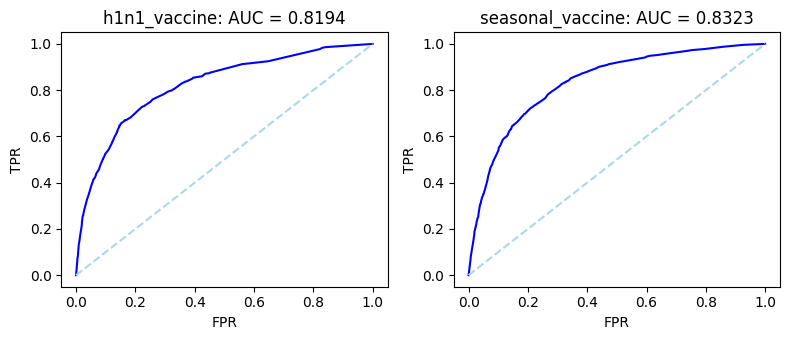

In [76]:
# Realizar la gráfica de la curva ROC
fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

plot_roc(
    y_val['h1n1_vaccine'], 
    y_preds['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_val['seasonal_vaccine'], 
    y_preds['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)

fig.tight_layout()
plt.show()

Vemos que al tener un AUC promedio de 0.84, el modelo de Stacking ha logrado un rendimiento bastante bueno en la predicción de probabilidades, con una curva ROC que se acerca algo más al rincón superior izquierdo, lo que indica una mejor separación entre las clases positivas y negativas.

Por clases, la curva ROC para la variable de salida `'h1n1_vaccine'` muestra un AUC de 0.82, mientras que la curva ROC para la variable de salida `'seasonal_vaccine'` muestra un AUC de 0.84, lo que refleja un mejor rendimiento en la predicción de las dos vacunas y principalmente en la vacuna estacional.

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#67bb74">

---
---
---
## **5. Predicción**
---
---
---

</span>

$\ $

<span style="color:#8ebee4">

---
---
### **5.1. Lectura del documento con el formato de envío**
---
---

</span>

Finalmente, pasamos a realizar las predicciones finales sobre el conjunto de test. Dichos datos de test ya los hemos cargado previamente, además de también haberlos  normalizado los mismos valores de normalización que los datos de entrenamiento.

Lo que hacemos ahora es cargar el documento con el formato de envío (`submission_format.csv`) para verificar que las predicciones se realizan correctamente y se guardan en el formato adecuado para poder enviarlas a la competición.

Dicho esto, procedemos a cargar el documento con el formato de envío y visualizar las primeras filas para comprobar que se ha cargado correctamente:

In [77]:
# Cargar el documento con el formato de la competencia
submission_df = pd.read_csv("../../Data/Original/submission_format.csv", index_col="respondent_id")

# Mostar los primeros registros del documento
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


Ahora, modificamos los índices del dataframe con los datos de test que ya habíamos normalizado previamente, para que coincidan con los índices del documento con el formato de envío, ya que tras el preporcesamiento común, los índices de los datos de test se habían reiniado, comenzando desde 0. Para ello, empleamos el método `set_index` de pandas.

Una vez hecho esto, podemos comprobar que los índices de los datos de test coinciden con los índices del documento con el formato de envío:

In [79]:
# Asegurarse de que X_test_df tenga los mismos índices que submission_df
X_test_df.index = submission_df.index

# Make sure we have the rows in the same order
np.testing.assert_array_equal(X_test_df.index.values, submission_df.index.values)

Mostrar las primeras filas de los datos de test con los índices modificados:

In [80]:
X_test_df.head()

,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,...,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,0.666667,1.0,1.00,0.038935,0.00,1.00,0.036890,0.00,0.25,1.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000
26708,0.333333,0.5,0.75,0.038935,0.00,0.75,0.036890,0.00,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000
26709,0.666667,1.0,1.00,0.759734,0.25,1.00,0.759223,0.75,0.50,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.000000
26710,0.333333,0.5,0.75,0.279201,0.25,0.75,0.759223,0.25,1.00,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000
26711,1.000000,0.5,1.00,0.279201,0.75,0.75,0.759223,0.25,0.25,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.333333


Esto aunque en realidad no es realmente necesario, ya que para obtener las predicciones vamos a emplear la variable `X_test` que contiene los datos de test normalizados, creada anteormente a partir del array `features_test_scaled`, puede ser de utilidad si queremos visualizar los datos de test para realizar alguna comprobación.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **5.2. kNN**
---
---

</span>

$\ $

<span style="color:#9a99e2">

---
#### **5.2.1. Predicción de valores enteros (predict)**
---

</span>

Ahora sí, pasamos a realizar las predicciones finales sobre el conjunto de test utilizando el modelo kNN. Para ello, empleamos el método `predict` del modelo kNN entrenado (`knn_best`) para predecir las etiquetas de clase para cada muestra en el conjunto de test.

In [81]:
# Evaluar KNN en el conjunto de validación
knn_test_preds = knn_best.predict(X_test)

Guardamos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro y las visualizamos para comprobar que se han realizado correctamente.

In [82]:
# Convertir las predicciones a un DataFrame de pandas
knn_test_preds_df = pd.DataFrame(knn_test_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_test_df.index)

# Guardar el DataFrame en un archivo CSV
knn_test_preds_df.to_csv('../../Data/Algorithms/Prueba2/knn_test_preds.csv', index=True)

# Mostrar los primeros registros de las predicciones
knn_test_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0,0
26708,0,0
26709,0,1
26710,0,1
26711,0,0


Dado que no disponemos de las etiquetas reales de los datos de test, no podemos evaluar el rendimiento del modelo kNN en este conjunto de datos. Sin embargo, podemos enviar las predicciones de las probabilidades calculadas con la función `predict_proba` a la competición para obtener una puntuación de evaluación. Para ello, pasaríamos a la siguiente sección.

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **5.2.2. Predicción de probabilidades (predict_proba)**
---

</span>

Pasamos pues a predecir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de test utilizando el modelo kNN entrenado.

In [83]:
# Evaluar KNN en el conjunto de validación
knn_test_preds_proba = knn_best.predict_proba(X_test)

Comprobamos la estructura de las matrices de probabilidades predichas por el modelo kNN para cada variable de salida.

In [84]:
# Estrutura de las predicciones
print("knn_test_preds_proba[0].shape", knn_test_preds_proba[0].shape)
print("knn_test_preds_proba[1].shape", knn_test_preds_proba[1].shape)

knn_test_preds_proba[0].shape (26708, 2)
knn_test_preds_proba[1].shape (26708, 2)


Y creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder enviar las predicciones a la competición. Dicho DataFrame sigue el formato del documento con el formato de envío, con las columnas `h1n1_vaccine` y `seasonal_vaccine` y los respectivos índices de las muestras.

In [87]:
# Crear una copia de submission_df para knn
submission_df_knn = submission_df.copy()

# Save predictions to submission data frame
submission_df_knn["h1n1_vaccine"] = knn_test_preds_proba[0][:, 1]
submission_df_knn["seasonal_vaccine"] = knn_test_preds_proba[1][:, 1]

submission_df_knn.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.000000,0.428571
26708,0.000000,0.000000
26709,0.285714,0.571429
26710,0.285714,0.571429
26711,0.142857,0.428571


Guardamos las predicciones en un archivo CSV para poder enviarlas a la competición.

In [89]:
# Guardar submission_df_stacking como un archivo CSV
submission_df_knn.to_csv('../../Data/Submission/Prueba2/submission_knn.csv', index=True)

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **5.2.3. Submission**
---

</span>

Finalmente, proporcionamos esta submission a la comptetencia de DrivenData para comprobar la eficacia de nuestro modelo con los valores obtenidos con `predic_proba`. Así, obtenemos:

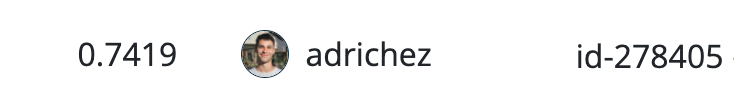

In [100]:
# Mostrar la imagen
display(Image(filename="../../Data/Submission/Prueba2/puntuacion_knn.png", width=350))

Una puntación de 0.74 indica que el modelo ha logrado un rendimiento moderado en la competición, con un AUC promedio de 0.74. Teniendo en cuenta que se ha empleado un modelo kNN, que es un algoritmo relativamente simple, el rendimiento obtenido es razonable. Sin embargo, es posible que se puedan obtener mejores resultados con modelos más complejos o con enfoques de ensamblado más avanzados, como por ejemplo, el modelo de Stacking que se ha implementado anteriormente.

$\ $

$\ $

$\ $

$\ $

$\ $

<span style="color:#8ebee4">

---
---
### **5.3. Stacking**
---
---

</span>

$\ $

<span style="color:#9a99e2">

---
#### **5.3.1. Predicción de valores enteros (predict)**
---

</span>

Pasamos ahora a realizar las predicciones finales sobre el conjunto de test utilizando el modelo de Stacking. Para ello, empleamos el método `predict` del modelo de Stacking entrenado (`multi_output_stacking_model`) para predecir las etiquetas de clase para cada muestra en el conjunto de test.

In [90]:
# Evaluar Stacking en el conjunto de validación
stacking_test_preds = multi_output_stacking_model.predict(X_test)

Y guardamos los resultados obtenidos en un DataFrame de pandas para poder visualizarlos de forma más cómoda, con los correspondientes nombres de las columnas dados por las respectivas etiquetas. Además, guardamos las predicciones en un archivo CSV, en caso de que queramos cargarlas en el futuro y las visualizamos para comprobar que se han realizado correctamente.

In [92]:
# Convertir las predicciones a un DataFrame de pandas
stacking_test_preds_df = pd.DataFrame(stacking_test_preds, columns=['h1n1_vaccine', 'seasonal_vaccine'], index=X_test_df.index)

# Guardar el DataFrame en un archivo CSV
stacking_test_preds_df.to_csv('../../Data/Algorithms/Prueba2/stacking_test_preds.csv', index=False)

# Mostrar los primeros registros de las predicciones
stacking_test_preds_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0,0
26708,0,0
26709,0,1
26710,0,1
26711,0,1


$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **5.3.2. Predicción de probabilidades (predict_proba)**
---

</span>

Ahora, pasamos a predecir las probabilidades de pertenencia a cada clase para cada muestra en el conjunto de test utilizando el modelo de Stacking entrenado.

In [93]:
# Evaluar KNN en el conjunto de validación
stacking_test_preds_proba = multi_output_stacking_model.predict_proba(X_test)

Mostramos la estructura de las matrices de probabilidades predichas por el modelo de Stacking para cada variable de salida.

In [94]:
# Estrutura de las predicciones
print("stacking_preds_proba[0].shape", stacking_test_preds_proba[0].shape)
print("stacking_preds_proba[1].shape", stacking_test_preds_proba[1].shape)

stacking_preds_proba[0].shape (26708, 2)
stacking_preds_proba[1].shape (26708, 2)


Creamos un DataFrame de pandas que contenga las probabilidades predichas para cada una de las variables de salida (`'h1n1_vaccine'` y `'seasonal_vaccine'`), en este caso utilizando las probabilidades de la clase positiva (índice 1) para cada variable de salida y guardamos este DataFrame en un archivo CSV para poder enviar las predicciones a la competición. Dicho DataFrame sigue el formato del documento con el formato de envío, con las columnas `h1n1_vaccine` y `seasonal_vaccine` y los respectivos índices de las muestras.

In [95]:
# Crear una copia de submission_df para knn
submission_df_stacking = submission_df.copy()

# Save predictions to submission data frame
submission_df_stacking["h1n1_vaccine"] = stacking_test_preds_proba[0][:, 1]
submission_df_stacking["seasonal_vaccine"] = stacking_test_preds_proba[1][:, 1]

submission_df_stacking.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.119564,0.230753
26708,0.070734,0.089748
26709,0.373230,0.692504
26710,0.337400,0.861476
26711,0.302657,0.537943


Y guardamos las predicciones en un archivo CSV para poder enviarlas a la competición.

In [96]:
# Guardar submission_df_stacking como un archivo CSV
submission_df_stacking.to_csv('../../Data/Submission/Prueba2/submission_stacking.csv', index=True)

$\ $

$\ $

$\ $

<span style="color:#9a99e2">

---
#### **5.3.3. Submission**
---

</span>

Finalmente, proporcionamos esta submission a la comptetencia de DrivenData para comprobar la eficacia de nuestro modelo con los valores obtenidos con `predic_proba`. Así, obtenemos:

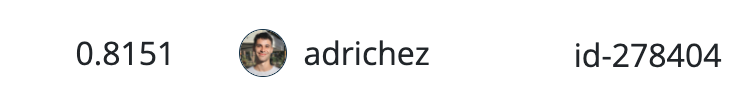

In [102]:
# Mostrar la imagen
display(Image(filename="../../Data/Submission/Prueba2/puntuacion_stacking.png", width=350))

En este caso, hemos obtenido una puntuación de 0.81, lo que indica que el modelo de Stacking ha logrado un rendimiento bastante bueno en la competición, con un AUC promedio de 0.81. Este resultado es superior al obtenido con el modelo kNN, lo que sugiere que la combinación de múltiples clasificadores en un ensemble de Stacking ha sido efectiva para mejorar la capacidad predictiva del modelo.